In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #we need to import everything to make a heatmap
thyroid_df = pd.read_csv(r'/Users/hilarytorres/Downloads/Thyroid_Diff.csv')
# the index_col=False, will remove the index column from the dataFrame

# determine (rows, columns) of df
thyroid_df.shape

# make a copy of the current df to pre-process and transform
th_df = thyroid_df.copy(deep=True)

# let's check the copy of the dataframe

th_df.head(5)

# versus the original dataframe

thyroid_df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [88]:
# the code below adds an in ID column based on the index + 1 to have the first entry start with 1

th_df['id'] = th_df.index + 1

In [89]:
th_df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,id
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,1
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,2
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,3
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,4
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,5


In [90]:
# now i want to change the order of the dataframe
th_df = th_df[['id', 'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
                        'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']]

th_df.head(5)

,id,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,1,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,2,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,3,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,4,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,5,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [91]:
th_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    383 non-null    int64 
 1   Age                   383 non-null    int64 
 2   Gender                383 non-null    object
 3   Smoking               383 non-null    object
 4   Hx Smoking            383 non-null    object
 5   Hx Radiothreapy       383 non-null    object
 6   Thyroid Function      383 non-null    object
 7   Physical Examination  383 non-null    object
 8   Adenopathy            383 non-null    object
 9   Pathology             383 non-null    object
 10  Focality              383 non-null    object
 11  Risk                  383 non-null    object
 12  T                     383 non-null    object
 13  N                     383 non-null    object
 14  M                     383 non-null    object
 15  Stage                 383 non-null    ob

In [92]:
# I want to create data model with the given characteristics to include: pathology, risk, stage, recurred

# first i will get dummies for the pathology column

path = pd.get_dummies(th_df.Pathology)

path.head(5)

,Follicular,Hurthel cell,Micropapillary,Papillary
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [93]:
path.head(5)

,Follicular,Hurthel cell,Micropapillary,Papillary
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [94]:
stg = pd.get_dummies(th_df.Stage)

In [95]:
stg.head(5)

,I,II,III,IVA,IVB
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False


In [96]:
disease_risk = pd.get_dummies(th_df.Risk)

In [97]:
disease_risk.head(5)

,High,Intermediate,Low
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [98]:
recurrence = pd.get_dummies(th_df.Recurred) 

In [99]:
practice = pd.concat([th_df, path], axis = 'columns')

In [21]:
practice.drop(['Pathology'], axis='columns')
print(practice)

      id  Age Gender Smoking Hx Smoking Hx Radiothreapy  \
0      1   27      F      No         No              No   
1      2   34      F      No        Yes              No   
2      3   30      F      No         No              No   
3      4   62      F      No         No              No   
4      5   62      F      No         No              No   
..   ...  ...    ...     ...        ...             ...   
378  379   72      M     Yes        Yes             Yes   
379  380   81      M     Yes         No             Yes   
380  381   72      M     Yes        Yes              No   
381  382   61      M     Yes        Yes             Yes   
382  383   67      M     Yes         No              No   

             Thyroid Function         Physical Examination Adenopathy  \
0                   Euthyroid   Single nodular goiter-left         No   
1                   Euthyroid          Multinodular goiter         No   
2                   Euthyroid  Single nodular goiter-right         No   

In [100]:
practice.head(5)

,id,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,...,T,N,M,Stage,Response,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary
0,1,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,...,T1a,N0,M0,I,Indeterminate,No,False,False,True,False
1,2,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,...,T1a,N0,M0,I,Excellent,No,False,False,True,False
2,3,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,...,T1a,N0,M0,I,Excellent,No,False,False,True,False
3,4,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,...,T1a,N0,M0,I,Excellent,No,False,False,True,False
4,5,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,...,T1a,N0,M0,I,Excellent,No,False,False,True,False


In [101]:
del practice['Pathology']

In [102]:
practice.head(5)

,id,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Focality,...,T,N,M,Stage,Response,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary
0,1,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Uni-Focal,...,T1a,N0,M0,I,Indeterminate,No,False,False,True,False
1,2,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Uni-Focal,...,T1a,N0,M0,I,Excellent,No,False,False,True,False
2,3,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Uni-Focal,...,T1a,N0,M0,I,Excellent,No,False,False,True,False
3,4,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Uni-Focal,...,T1a,N0,M0,I,Excellent,No,False,False,True,False
4,5,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Multi-Focal,...,T1a,N0,M0,I,Excellent,No,False,False,True,False


In [103]:
disease_risk = pd.get_dummies(th_df.Risk)

In [104]:
disease_risk.head(5)

,High,Intermediate,Low
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [105]:
practice_two = pd.concat([practice, disease_risk], axis='columns')

In [28]:
practice_two.drop(['Risk'], axis='columns')
print(practice_two)

      id  Age Gender Smoking Hx Smoking Hx Radiothreapy  \
0      1   27      F      No         No              No   
1      2   34      F      No        Yes              No   
2      3   30      F      No         No              No   
3      4   62      F      No         No              No   
4      5   62      F      No         No              No   
..   ...  ...    ...     ...        ...             ...   
378  379   72      M     Yes        Yes             Yes   
379  380   81      M     Yes         No             Yes   
380  381   72      M     Yes        Yes              No   
381  382   61      M     Yes        Yes             Yes   
382  383   67      M     Yes         No              No   

             Thyroid Function         Physical Examination Adenopathy  \
0                   Euthyroid   Single nodular goiter-left         No   
1                   Euthyroid          Multinodular goiter         No   
2                   Euthyroid  Single nodular goiter-right         No   

In [106]:
practice_two.head(5)

,id,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Focality,...,Stage,Response,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low
0,1,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Uni-Focal,...,I,Indeterminate,No,False,False,True,False,False,False,True
1,2,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Uni-Focal,...,I,Excellent,No,False,False,True,False,False,False,True
2,3,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Uni-Focal,...,I,Excellent,No,False,False,True,False,False,False,True
3,4,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Uni-Focal,...,I,Excellent,No,False,False,True,False,False,False,True
4,5,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Multi-Focal,...,I,Excellent,No,False,False,True,False,False,False,True


In [107]:
del practice_two['Smoking']

In [108]:
del practice_two['Hx Smoking']

In [109]:
del practice_two['Hx Radiothreapy']

In [110]:
del practice_two['Thyroid Function']

In [111]:
practice_two.head(5)

,id,Age,Gender,Physical Examination,Adenopathy,Focality,Risk,T,N,M,Stage,Response,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low
0,1,27,F,Single nodular goiter-left,No,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,False,False,True,False,False,False,True
1,2,34,F,Multinodular goiter,No,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True
2,3,30,F,Single nodular goiter-right,No,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True
3,4,62,F,Single nodular goiter-right,No,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True
4,5,62,F,Multinodular goiter,No,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True


In [112]:
del practice_two['Physical Examination']

In [113]:
del practice_two['Adenopathy']

In [114]:
practice_two.head(5)

,id,Age,Gender,Focality,Risk,T,N,M,Stage,Response,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low
0,1,27,F,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,False,False,True,False,False,False,True
1,2,34,F,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True
2,3,30,F,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True
3,4,62,F,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True
4,5,62,F,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,False,False,True,False,False,False,True


In [115]:
final = pd.concat([practice_two, stg], axis='columns')

In [116]:
final.drop(['Stage'], axis='columns')

,id,Age,Gender,Focality,Risk,T,N,M,Response,Recurred,...,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB
0,1,27,F,Uni-Focal,Low,T1a,N0,M0,Indeterminate,No,...,True,False,False,False,True,True,False,False,False,False
1,2,34,F,Uni-Focal,Low,T1a,N0,M0,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
2,3,30,F,Uni-Focal,Low,T1a,N0,M0,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
3,4,62,F,Uni-Focal,Low,T1a,N0,M0,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
4,5,62,F,Multi-Focal,Low,T1a,N0,M0,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,72,M,Uni-Focal,High,T4b,N1b,M1,Biochemical Incomplete,Yes,...,False,True,True,False,False,False,False,False,False,True
379,380,81,M,Multi-Focal,High,T4b,N1b,M1,Structural Incomplete,Yes,...,False,True,True,False,False,False,False,False,False,True
380,381,72,M,Multi-Focal,High,T4b,N1b,M1,Structural Incomplete,Yes,...,False,True,True,False,False,False,False,False,False,True
381,382,61,M,Multi-Focal,High,T4b,N1b,M0,Structural Incomplete,Yes,...,False,False,True,False,False,False,False,False,True,False


In [117]:
del final['Risk']

In [118]:
final.head(5)

,id,Age,Gender,Focality,T,N,M,Stage,Response,Recurred,...,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB
0,1,27,F,Uni-Focal,T1a,N0,M0,I,Indeterminate,No,...,True,False,False,False,True,True,False,False,False,False
1,2,34,F,Uni-Focal,T1a,N0,M0,I,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
2,3,30,F,Uni-Focal,T1a,N0,M0,I,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
3,4,62,F,Uni-Focal,T1a,N0,M0,I,Excellent,No,...,True,False,False,False,True,True,False,False,False,False
4,5,62,F,Multi-Focal,T1a,N0,M0,I,Excellent,No,...,True,False,False,False,True,True,False,False,False,False


In [119]:
del final['Focality']

In [120]:
del final['T']

In [121]:
del final['N']

In [122]:
del final['M']

In [123]:
final.head(5)

,id,Age,Gender,Stage,Response,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB
0,1,27,F,I,Indeterminate,No,False,False,True,False,False,False,True,True,False,False,False,False
1,2,34,F,I,Excellent,No,False,False,True,False,False,False,True,True,False,False,False,False
2,3,30,F,I,Excellent,No,False,False,True,False,False,False,True,True,False,False,False,False
3,4,62,F,I,Excellent,No,False,False,True,False,False,False,True,True,False,False,False,False
4,5,62,F,I,Excellent,No,False,False,True,False,False,False,True,True,False,False,False,False


In [124]:
del final['Stage']

In [125]:
del final['Response']

In [126]:
final.head(5)

,id,Age,Gender,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB
0,1,27,F,No,False,False,True,False,False,False,True,True,False,False,False,False
1,2,34,F,No,False,False,True,False,False,False,True,True,False,False,False,False
2,3,30,F,No,False,False,True,False,False,False,True,True,False,False,False,False
3,4,62,F,No,False,False,True,False,False,False,True,True,False,False,False,False
4,5,62,F,No,False,False,True,False,False,False,True,True,False,False,False,False


In [127]:
del final['Age']

In [128]:
del final['Gender']

In [129]:
final.head(5)

,id,Recurred,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB
0,1,No,False,False,True,False,False,False,True,True,False,False,False,False
1,2,No,False,False,True,False,False,False,True,True,False,False,False,False
2,3,No,False,False,True,False,False,False,True,True,False,False,False,False
3,4,No,False,False,True,False,False,False,True,True,False,False,False,False
4,5,No,False,False,True,False,False,False,True,True,False,False,False,False


In [130]:
final = final[['id', 'Follicular', 'Hurthel cell', 'Micropapillary', 'Papillary', 'High', 'Intermediate', 'Low',
              'I', 'II', 'III', 'IVA', 'IVB', 'Recurred']]

In [131]:
final.head(5)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,Recurred
0,1,False,False,True,False,False,False,True,True,False,False,False,False,No
1,2,False,False,True,False,False,False,True,True,False,False,False,False,No
2,3,False,False,True,False,False,False,True,True,False,False,False,False,No
3,4,False,False,True,False,False,False,True,True,False,False,False,False,No
4,5,False,False,True,False,False,False,True,True,False,False,False,False,No


In [132]:
dm_outcome = pd.concat([final, recurrence], axis='columns')

In [55]:
dm_outcome.drop(['Recurred'], axis='columns')
print(dm_outcome)

      id  Follicular  Hurthel cell  Micropapillary  Papillary   High  \
0      1       False         False            True      False  False   
1      2       False         False            True      False  False   
2      3       False         False            True      False  False   
3      4       False         False            True      False  False   
4      5       False         False            True      False  False   
..   ...         ...           ...             ...        ...    ...   
378  379       False         False           False       True   True   
379  380       False         False           False       True   True   
380  381       False         False           False       True   True   
381  382       False          True           False      False   True   
382  383       False         False           False       True   True   

     Intermediate    Low      I     II    III    IVA    IVB Recurred     No  \
0           False   True   True  False  False  False  Fa

In [133]:
dm_outcome.head(5)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,Recurred,No,Yes
0,1,False,False,True,False,False,False,True,True,False,False,False,False,No,True,False
1,2,False,False,True,False,False,False,True,True,False,False,False,False,No,True,False
2,3,False,False,True,False,False,False,True,True,False,False,False,False,No,True,False
3,4,False,False,True,False,False,False,True,True,False,False,False,False,No,True,False
4,5,False,False,True,False,False,False,True,True,False,False,False,False,No,True,False


In [134]:
del dm_outcome['Recurred']

In [135]:
dm_outcome.head(5)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,No,Yes
0,1,False,False,True,False,False,False,True,True,False,False,False,False,True,False
1,2,False,False,True,False,False,False,True,True,False,False,False,False,True,False
2,3,False,False,True,False,False,False,True,True,False,False,False,False,True,False
3,4,False,False,True,False,False,False,True,True,False,False,False,False,True,False
4,5,False,False,True,False,False,False,True,True,False,False,False,False,True,False


In [136]:
dm_outcome.shape

(383, 15)

In [137]:
dm_outcome['Follicular'] = dm_outcome['Follicular'].astype(int)

In [138]:
dm_outcome['Hurthel cell'] = dm_outcome['Hurthel cell'].astype(int)

In [139]:
dm_outcome['Micropapillary'] = dm_outcome['Micropapillary'].astype(int)

In [140]:
dm_outcome['Papillary'] = dm_outcome['Papillary'].astype(int)

In [141]:
dm_outcome['High'] = dm_outcome['High'].astype(int)

In [142]:
dm_outcome['Intermediate'] = dm_outcome['Intermediate'].astype(int)

In [143]:
dm_outcome['Low'] = dm_outcome['Low'].astype(int)

In [144]:
dm_outcome['I'] = dm_outcome['I'].astype(int)

In [145]:
dm_outcome['II'] = dm_outcome['II'].astype(int)

In [146]:
dm_outcome['III'] = dm_outcome['III'].astype(int)

In [147]:
dm_outcome['IVA'] = dm_outcome['IVA'].astype(int)

In [148]:
dm_outcome['IVB'] = dm_outcome['IVB'].astype(int)

In [149]:
dm_outcome['No'] = dm_outcome['No'].astype(int)

In [150]:
dm_outcome['Yes'] = dm_outcome['Yes'].astype(int)

In [151]:
dm_outcome.head(5)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,No,Yes
0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,5,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [152]:
# rename No column to has_not_recurred, Yes column to has_recurred

dm_outcome.rename(columns={'No': 'has_not_recurred', 'Yes': 'has_recurred'}, inplace=True)

In [153]:
dm_outcome.head(5)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,has_not_recurred,has_recurred
0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,5,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [154]:
dm_outcome.rename(columns={'Follicular': 'follicular', 'Hurthel cell': 'hurthel cell', 'Micropapillary': 'micropapillary',
                            'Papillary': 'papillary', 'High': 'high risk', 'Intermediate': 'intermediate risk', 
                           'Low': 'low risk', 'I': 'stage 1', 'II': 'stage 2', 'III': 'stage 3', 'IVA': 'stage 4A',
                           'IVB': 'stage 4B', 'has_not_recurred': 'has not recurred', 'has_recurred': 'has recurred'})

                           

,id,follicular,hurthel cell,micropapillary,papillary,high risk,intermediate risk,low risk,stage 1,stage 2,stage 3,stage 4A,stage 4B,has not recurred,has recurred
0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,5,0,0,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379,0,0,0,1,1,0,0,0,0,0,0,1,0,1
379,380,0,0,0,1,1,0,0,0,0,0,0,1,0,1
380,381,0,0,0,1,1,0,0,0,0,0,0,1,0,1
381,382,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [155]:
dm_outcome.shape

(383, 15)

In [156]:
dm_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                383 non-null    int64
 1   Follicular        383 non-null    int64
 2   Hurthel cell      383 non-null    int64
 3   Micropapillary    383 non-null    int64
 4   Papillary         383 non-null    int64
 5   High              383 non-null    int64
 6   Intermediate      383 non-null    int64
 7   Low               383 non-null    int64
 8   I                 383 non-null    int64
 9   II                383 non-null    int64
 10  III               383 non-null    int64
 11  IVA               383 non-null    int64
 12  IVB               383 non-null    int64
 13  has_not_recurred  383 non-null    int64
 14  has_recurred      383 non-null    int64
dtypes: int64(15)
memory usage: 45.0 KB


In [157]:
dm_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                383 non-null    int64
 1   Follicular        383 non-null    int64
 2   Hurthel cell      383 non-null    int64
 3   Micropapillary    383 non-null    int64
 4   Papillary         383 non-null    int64
 5   High              383 non-null    int64
 6   Intermediate      383 non-null    int64
 7   Low               383 non-null    int64
 8   I                 383 non-null    int64
 9   II                383 non-null    int64
 10  III               383 non-null    int64
 11  IVA               383 non-null    int64
 12  IVB               383 non-null    int64
 13  has_not_recurred  383 non-null    int64
 14  has_recurred      383 non-null    int64
dtypes: int64(15)
memory usage: 45.0 KB


In [158]:
dm_outcome.head(10)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,has_not_recurred,has_recurred
0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
1,2,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,3,0,0,1,0,0,0,1,1,0,0,0,0,1,0
3,4,0,0,1,0,0,0,1,1,0,0,0,0,1,0
4,5,0,0,1,0,0,0,1,1,0,0,0,0,1,0
5,6,0,0,1,0,0,0,1,1,0,0,0,0,1,0
6,7,0,0,1,0,0,0,1,1,0,0,0,0,1,0
7,8,0,0,1,0,0,0,1,1,0,0,0,0,1,0
8,9,0,0,1,0,0,0,1,1,0,0,0,0,1,0
9,10,0,0,1,0,0,0,1,1,0,0,0,0,1,0


In [159]:
dm_outcome.tail(5)

,id,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,has_not_recurred,has_recurred
378,379,0,0,0,1,1,0,0,0,0,0,0,1,0,1
379,380,0,0,0,1,1,0,0,0,0,0,0,1,0,1
380,381,0,0,0,1,1,0,0,0,0,0,0,1,0,1
381,382,0,1,0,0,1,0,0,0,0,0,1,0,0,1
382,383,0,0,0,1,1,0,0,0,0,0,1,0,0,1


Text(0.5, 1.0, 'Thyroid Recurrence and its Relationship to Thyroid Histology, Risk, and Overall Stage')

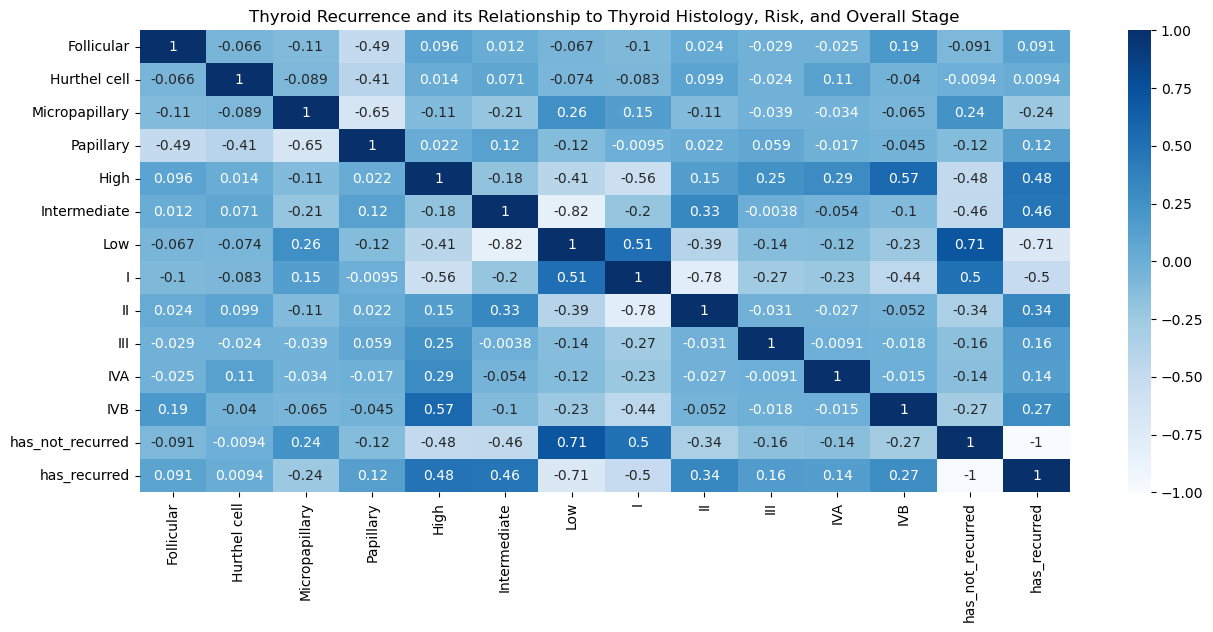

In [175]:
# del dm_outcome['id']

dm_outcome.head(5)


#determining collinearity of relationships between these variables in seaborn
# https://medium.com/@rokaandy/python-data-visualization-heatmaps-79fa7506c410

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(dm_outcome.corr(), center=0, cmap= "Blues", annot=True)
ax.set_title("Thyroid Recurrence and its Relationship to Thyroid Histology, Risk, and Overall Stage")

In [176]:
# Calculate the correlation of all features with 'Low' Risk Column
correlations = dm_outcome.corr(numeric_only=True)['Low'].sort_values(ascending=False)
 
# Display the top 10 features most correlated with 'Low'
top_correlations = correlations[1:11]
print(top_correlations)

has_not_recurred    0.708266
I                   0.511965
Micropapillary      0.261149
Follicular         -0.067375
Hurthel cell       -0.073889
Papillary          -0.121108
IVA                -0.121120
III                -0.140042
IVB                -0.234408
II                 -0.391810
Name: Low, dtype: float64


In [179]:
# now I want to look at the corrlations of all features of the has_not_recurred
correlations = dm_outcome.corr(numeric_only=True)['has_not_recurred'].sort_values(ascending=False)

NO_recurrence_correlations = correlations[1:11]
print(NO_recurrence_correlations)

Low               0.708266
I                 0.497763
Micropapillary    0.237216
Hurthel cell     -0.009398
Follicular       -0.091492
Papillary        -0.121444
IVA              -0.141783
III              -0.163932
IVB              -0.274397
II               -0.335022
Name: has_not_recurred, dtype: float64


In [185]:
# now I want to look at the correlations of the features of the has_recurred
# there is something wrong with this outcome below

correlations = dm_outcome.corr(numeric_only=True)['has_recurred'].sort_values(ascending=False)

# correlations[-10:] is how you find the negative correlations
has_recurred_correlations = correlations[1:11]
print(has_recurred_correlations)

# i need to figure out if these our negative associations?

High              0.481810
Intermediate      0.462566
II                0.335022
IVB               0.274397
III               0.163932
IVA               0.141783
Papillary         0.121444
Follicular        0.091492
Hurthel cell      0.009398
Micropapillary   -0.237216
Name: has_recurred, dtype: float64


In [193]:
# scatter plot for has_not_recurred and Low columns 

# dm_outcome.head(5)
# dm_outcome['id'] = dm_outcome.index + 1 #this adds an idex column to the subset

# dm_outcome.head(5)

# sns.scatterplot(x=dm_outcome['Low'], y=dm_outcome['has_not_recurred'], color="blue", alpha=0.6)
# # ax[0, 0].set_title("Has Not Recurred vs Low Risk")
# ax[0, 0].set_ylabel('Has Not Recurred')
# ax[0, 0].set_xlabel('Low Risk')

,Follicular,Hurthel cell,Micropapillary,Papillary,High,Intermediate,Low,I,II,III,IVA,IVB,has_not_recurred,has_recurred,id
0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,2
2,0,0,1,0,0,0,1,1,0,0,0,0,1,0,3
3,0,0,1,0,0,0,1,1,0,0,0,0,1,0,4
4,0,0,1,0,0,0,1,1,0,0,0,0,1,0,5
